In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random



### Import the data set

In [2]:
#Import data set
#If you want to work with entire data set uncomment the line below else use the random sampling
#water_quality_final = pd.read_csv('Water_FINAL.csv', low_memory= False)

n = 2708716 #number of records in file water_final.csv
s = 10000 #desired sample size
filename = "Water_FINAL.csv"
skip = sorted(random.sample(range(1,n+1),n-s))

water_quality_final = pd.read_csv(filename, skiprows=skip, low_memory=False)

In [3]:
water_quality_final.shape


(10001, 73)


### Drop the unecessary columns from the data set as these columns are mostly filled with nans

In [4]:
water_quality_final.drop(columns = {"Unnamed: 0", "Unnamed: 0.1", "Agency", "BiasPC", "CloudCover", "Comments"}, inplace = True )
list_of_columns = list(water_quality_final.columns)



### Convert the date formate to pandas datetime format for time series modeling


### Replace the different tier levels with t3 data. 

In [5]:
water_quality_final['Date'] = pd.to_datetime(water_quality_final.Date)
water_quality_final["TierLevel"].unique()
water_quality_final["TierLevel"]= water_quality_final["TierLevel"].replace({"T3": 3, "p2": 2,"p1": 1, "3.0": 3, "2.0": 2,"1.0": 1})

water_quality_final["TierLevel"] = water_quality_final["TierLevel"].astype(int)

In [6]:
water_collection_dates = water_quality_final[water_quality_final["Unit"] == "DEG C"  ]
water_collection_dates = water_collection_dates["Date"].where(water_quality_final["TierLevel"] == 3)
water_temp = water_quality_final[water_quality_final["Unit"] == "DEG C"]
water_temp = water_temp["MeasureValue"].where(water_quality_final["TierLevel"] == 3)

Text(0.5, 0, 'Water temp in C')

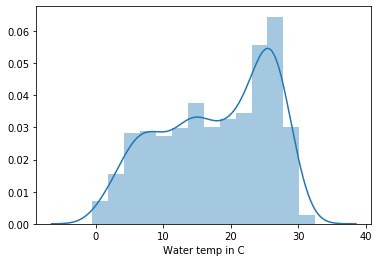

In [7]:
water_temp.mean()
sns.distplot(water_temp)
plt.xlabel("Water temp in C")

(-10, 100)

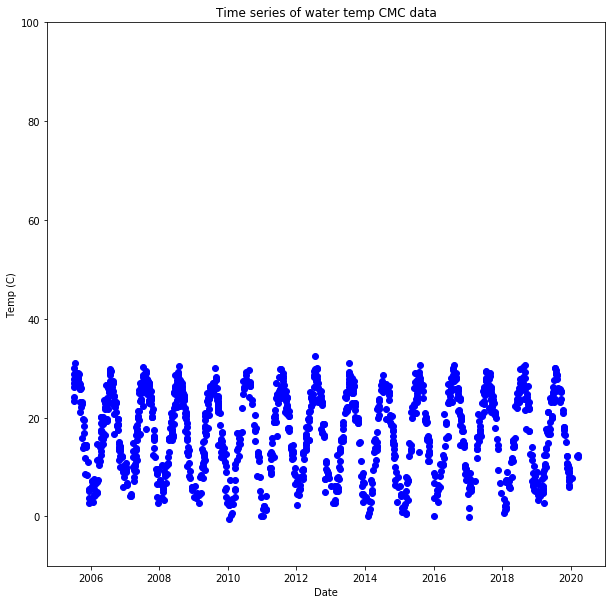

In [8]:

water_fig, water_ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
water_ax.scatter(water_collection_dates, water_temp,  color='blue')

# Set title and labels for axes

water_ax.set(xlabel="Date",
       ylabel="Temp (C)",             
       title="Time series of water temp CMC data")

plt.ylim(-10, 100)

In [9]:
plt.show()

In [10]:
### Now lets find yearly averages and box plot them. 
water_quality_final['Date'] = pd.to_datetime(water_quality_final.Date)
water_collection_dates = water_quality_final[water_quality_final["Unit"] == "DEG C"  ]

years, j = [], 0
#I think this is pretty gross, but ya know. I'm not great at groupby data
for i in range(2006, 2020):
    years.append(str(i))

measure_value_years, year_list_df =[None]*len(years), [None]*len(years)
## Measure_value_years contains an array of the years measurements, yearlistdf is the data frame per year

for i in years:
    
    start_date, end_date= i+'-01-01',i+'-12-31'
    
    get_year_data = (water_collection_dates['Date'] > start_date) & (water_collection_dates['Date'] <= end_date)

    year_df = water_collection_dates.loc[get_year_data]
    year_list_df[j] = year_df
    
    measure_value_years[j] = year_df["MeasureValue"]  
    j +=1



Text(0.5, 0, 'Distribution of mean temp(C) from 2006-2019')

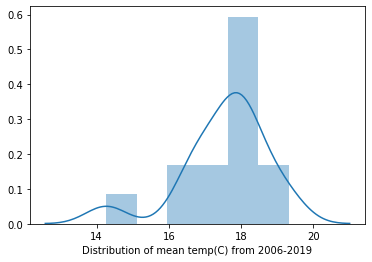

In [11]:
mean_temp, var_temp = [], []
list_of_years=[]
for i in measure_value_years: mean_temp.append(i.mean()), var_temp.append(i.var())
for y in range(2006, 2020): list_of_years.append(y)
sns.distplot(mean_temp)
plt.xlabel("Distribution of mean temp(C) from 2006-2019")


Text(0.5, 0, 'Distribution of temp varience (C) from 2006-2019')

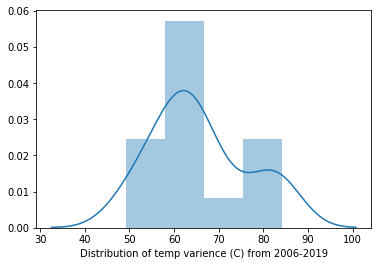

In [12]:
sns.distplot(var_temp)
plt.xlabel("Distribution of temp varience (C) from 2006-2019")

Text(0.5, 0, 'Year')

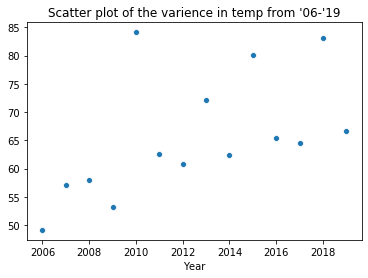

In [13]:
sns.scatterplot(x = list_of_years, y = var_temp)
plt.title("Scatter plot of the varience in temp from '06-'19")
plt.xlabel("Year")

Text(0.5, 0, 'Year')

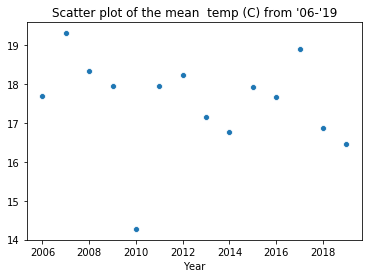

In [14]:
sns.scatterplot(x = list_of_years, y = mean_temp)
plt.title("Scatter plot of the mean  temp (C) from '06-'19")
plt.xlabel("Year")